In [7]:
import pandas as pd

# Load the dataset

data = pd.read_csv("deliveries.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


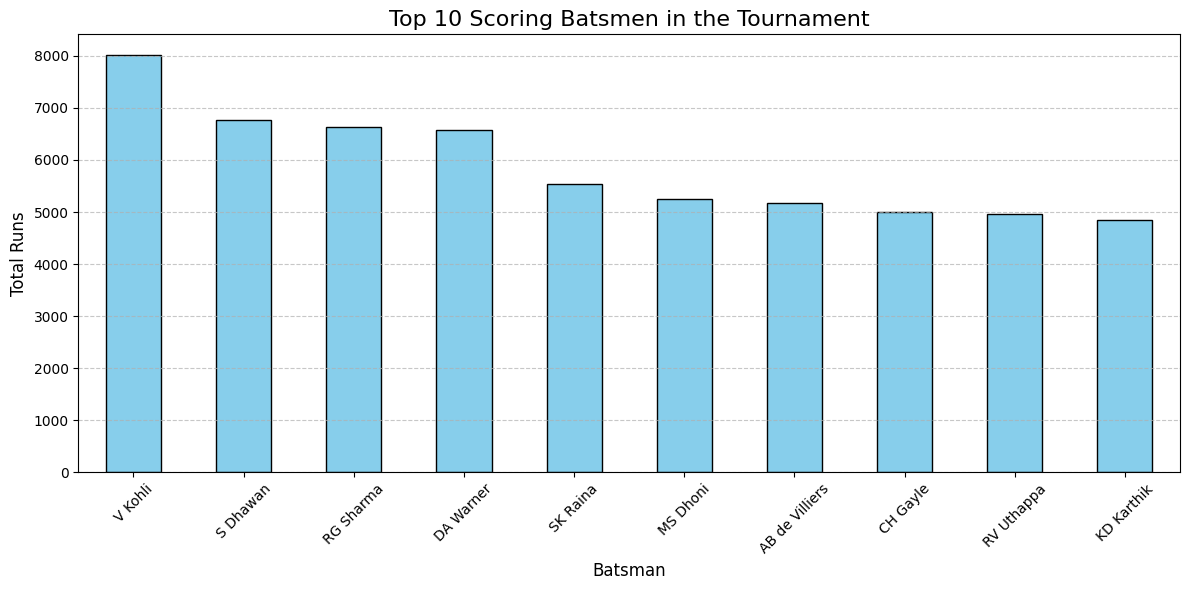

In [8]:
import matplotlib.pyplot as plt

# Calculate total runs scored by each batsman
top_batsmen = data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 scoring batsmen
plt.figure(figsize=(12, 6))
top_batsmen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Scoring Batsmen in the Tournament', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

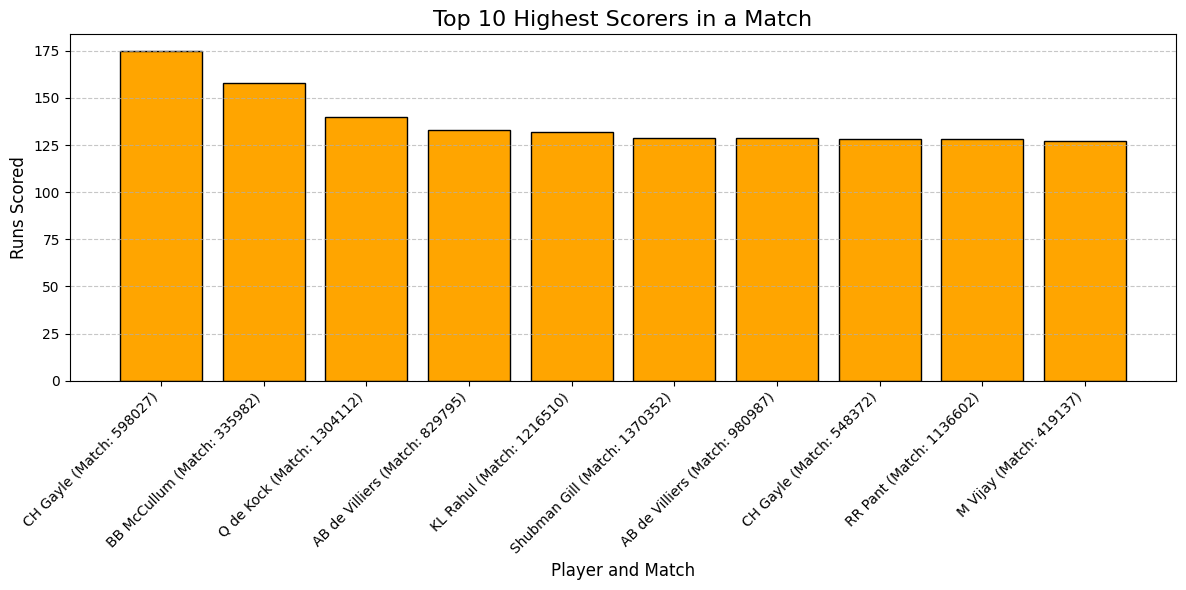

In [9]:
# Calculate total runs scored by each batsman in each match
match_batsman_scores = data.groupby(['match_id', 'batter'])['batsman_runs'].sum()

# Extract the top 10 highest scores in a match
top_match_scores = match_batsman_scores.sort_values(ascending=False).head(10)

# Prepare data for plotting
top_match_scores = top_match_scores.reset_index()
top_match_scores['label'] = top_match_scores['batter'] + ' (Match: ' + top_match_scores['match_id'].astype(str) + ')'

# Plot the top 10 highest scores in a match
plt.figure(figsize=(12, 6))
plt.bar(top_match_scores['label'], top_match_scores['batsman_runs'], color='orange', edgecolor='black')
plt.title('Top 10 Highest Scorers in a Match', fontsize=16)
plt.xlabel('Player and Match', fontsize=12)
plt.ylabel('Runs Scored', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

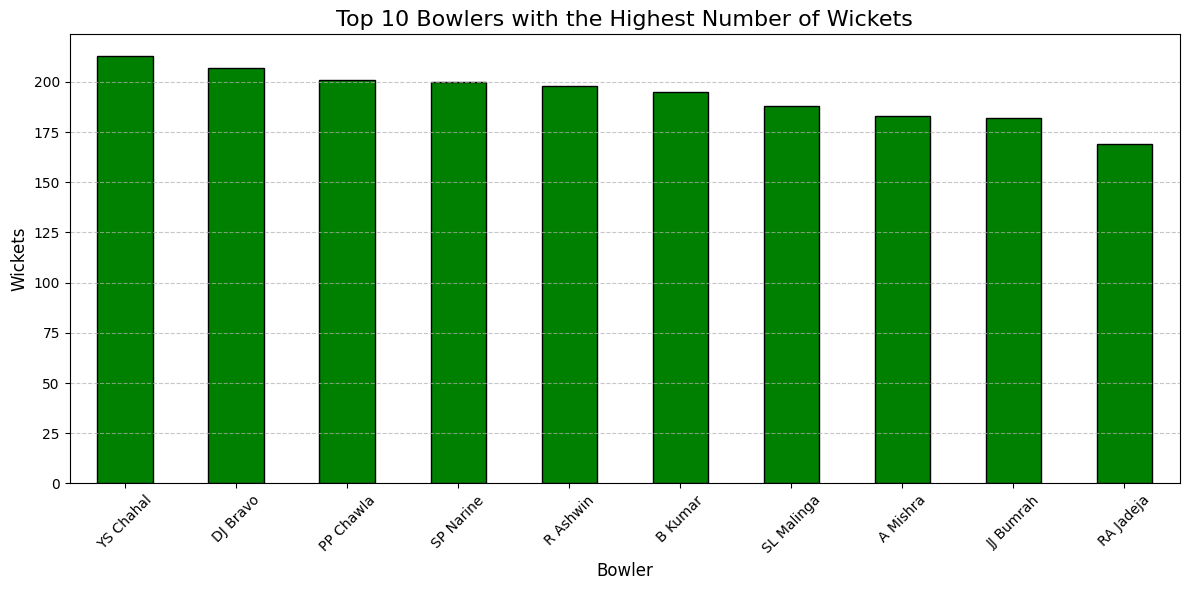

In [10]:
# Filter data for deliveries resulting in a wicket
wickets = data[data['is_wicket'] == 1]

# Count the number of wickets taken by each bowler
top_bowlers = wickets['bowler'].value_counts().head(10)

# Plot the top 10 bowlers with the highest number of wickets
plt.figure(figsize=(12, 6))
top_bowlers.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Bowlers with the Highest Number of Wickets', fontsize=16)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Wickets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

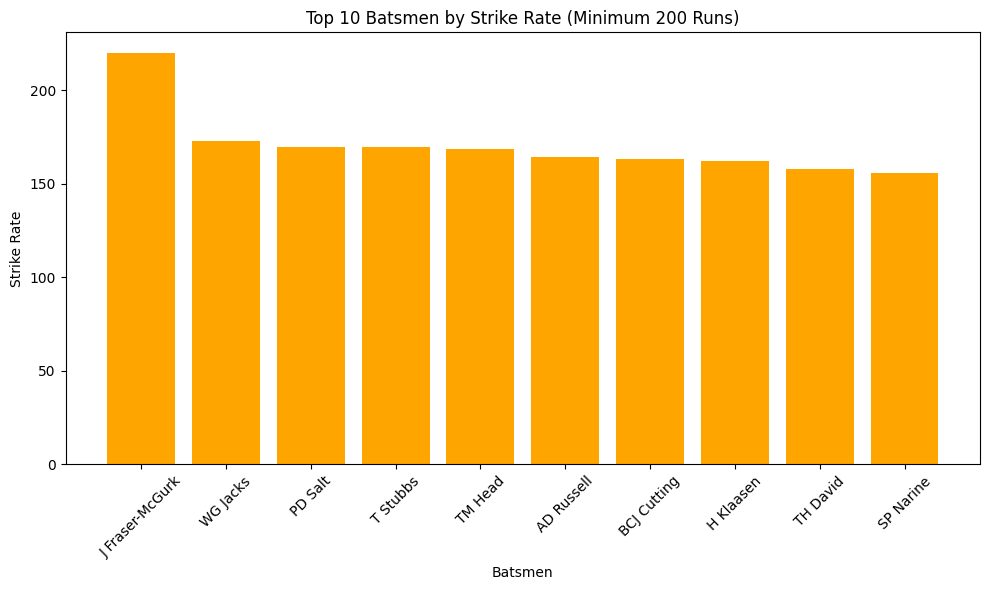

In [11]:
import matplotlib.pyplot as plt

# Condition 1: Strike Rate calculation for batsmen (with minimum run threshold)
# Strike Rate = (Total Runs / Balls Faced) * 100
def calculate_strike_rate(data, min_runs=200):
    batsman_stats = data.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})
    batsman_stats = batsman_stats.rename(columns={'batsman_runs': 'Total Runs', 'ball': 'Balls Faced'})
    batsman_stats['Strike Rate'] = (batsman_stats['Total Runs'] / batsman_stats['Balls Faced']) * 100
    filtered_stats = batsman_stats[batsman_stats['Total Runs'] >= min_runs]
    return filtered_stats.sort_values(by='Strike Rate', ascending=False)

# Calculate strike rates
batsman_strike_rates = calculate_strike_rate(data, min_runs=200)

# Plot Strike Rate graph
plt.figure(figsize=(10, 6))
plt.bar(batsman_strike_rates.index[:10], batsman_strike_rates['Strike Rate'][:10], color='orange')
plt.xticks(rotation=45)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Top 10 Batsmen by Strike Rate (Minimum 200 Runs)')
plt.tight_layout()
plt.show()

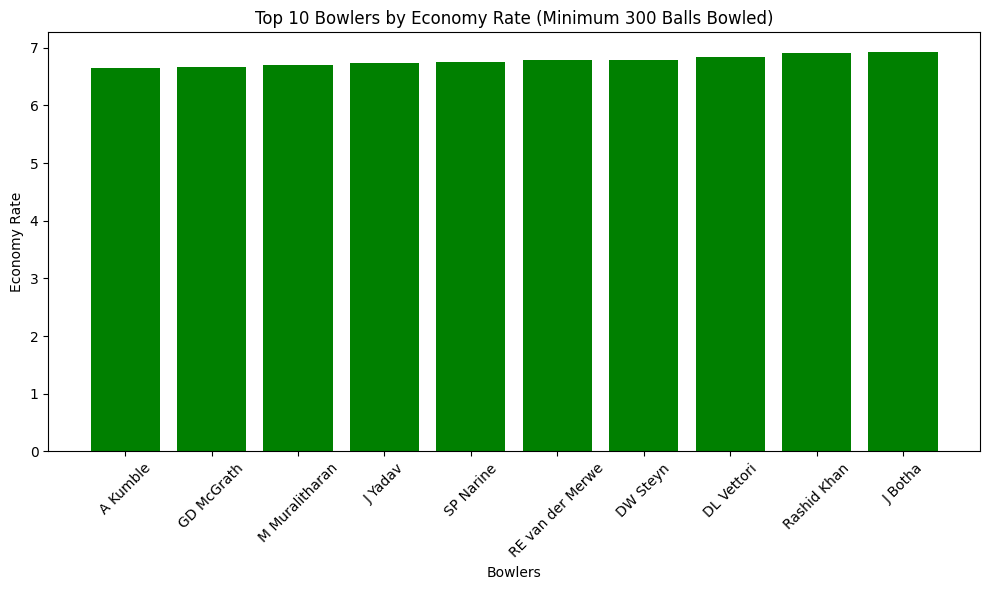

In [12]:
# Condition 3: Economy Rate calculation for bowlers (with a ball limit)
# Economy Rate = Runs Conceded / Overs Bowled
def calculate_economy_rate(data, min_balls=300):
    bowler_stats = data.groupby('bowler').agg({'total_runs': 'sum', 'ball': 'count'})
    bowler_stats = bowler_stats.rename(columns={'total_runs': 'Runs Conceded', 'ball': 'Balls Bowled'})
    bowler_stats['Economy Rate'] = bowler_stats['Runs Conceded'] / (bowler_stats['Balls Bowled'] / 6)
    filtered_bowlers = bowler_stats[bowler_stats['Balls Bowled'] >= min_balls]
    return filtered_bowlers.sort_values(by='Economy Rate')

# Calculate economy rates
bowler_economy_rates = calculate_economy_rate(data, min_balls=300)

# Plot Economy Rate graph
plt.figure(figsize=(10, 6))
plt.bar(bowler_economy_rates.index[:10], bowler_economy_rates['Economy Rate'][:10], color='green')
plt.xticks(rotation=45)
plt.xlabel('Bowlers')
plt.ylabel('Economy Rate')
plt.title('Top 10 Bowlers by Economy Rate (Minimum 300 Balls Bowled)')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [6]:
kohli_scores = df[df['batter'] == "V Kohli"]
kohli_matchwise_score = kohli_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
kohli_matchwise_score_sub = kohli_matchwise_score.head(20)
kohli_matchwise_score_sub

#prepare data for ARIMA
kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))
kohli_matchwise_score_sub.set_index("match_number", inplace=True)

#fit ARIMA model
model = ARIMA(kohli_matchwise_score_sub["batsman_runs"], order=(1,1,1))
model_fit = model.fit()

#forecast
forecast = model_fit.forecast(steps=10)
print(forecast)

C:\Users\Navya Sree\AppData\Local\Temp\ipykernel_5328\1983224498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))


20    17.174989
21    16.235951
22    16.641375
23    16.466336
24    16.541908
25    16.509280
26    16.523367
27    16.517285
28    16.519911
29    16.518777
Name: predicted_mean, dtype: float64


In [18]:
import pandas as pd
df = pd.read_csv('deliveries.csv')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

total_runs = df.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs = total_runs.sort_values(by='batsman_runs', ascending=False)
top_10_batsman = total_runs.head(10)
print(top_10_batsman)


p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

model = SARIMAX(top_10_batsman['batsman_runs'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)
print(model_fit.summary())
predicted_values = model_fit.predict(start=0,  # Start at the beginning of the dataend=len(top_10_batsman) + 9,  # Predict 10 steps ahead
dynamic=False)
print(predicted_values)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Navya Sree\AppData\Loca

                                     SARIMAX Results                                      
Dep. Variable:                       batsman_runs   No. Observations:                   10
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 20 Dec 2024   AIC                             10.000
Time:                                    15:58:55   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 10                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
c:\Users\Navya Sree\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:472: RuntimeWarning: Mean of empty s

In [19]:
batsman_stats = df.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')  # Total balls faced by each batsman
).reset_index()

batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)
print(top_10_batsmen)

              batter  total_runs  balls_faced  strike_rate
312           L Wood           9            3   300.000000
97        B Stanlake           5            2   250.000000
234  J Fraser-McGurk         330          150   220.000000
461    R Sai Kishore          13            6   216.666667
629         Umar Gul          39           19   205.263158
497         RS Sodhi           4            2   200.000000
583    Shahid Afridi          81           46   176.086957
222       I Malhotra           7            4   175.000000
652         WG Jacks         230          133   172.932331
433          PD Salt         653          385   169.610390


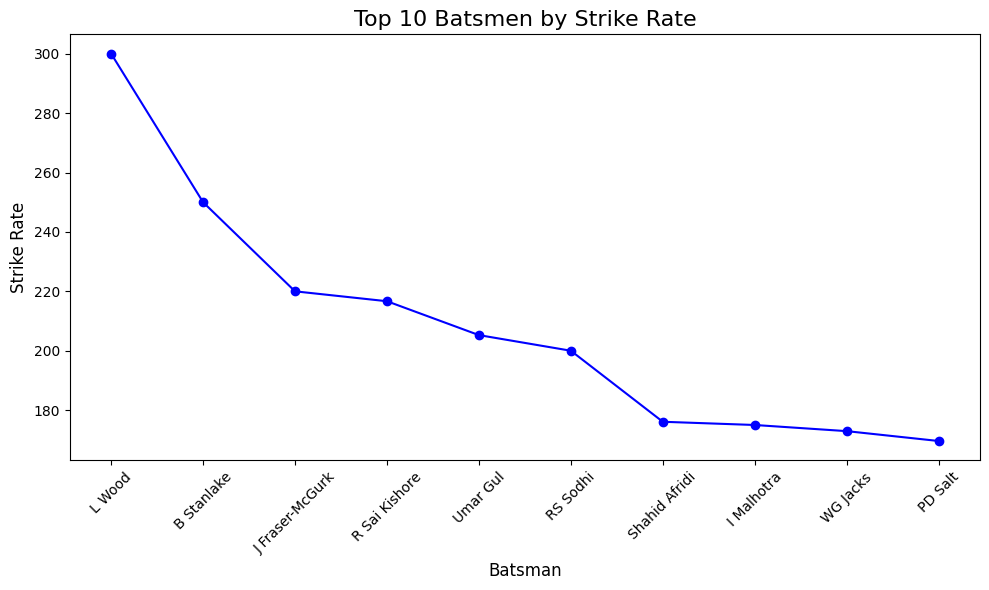

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_batsmen['batter'], top_10_batsmen['strike_rate'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Batsmen by Strike Rate', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Group by bowler to calculate total runs conceded and total balls bowled
bowler_stats = df.groupby('bowler').agg(
    total_runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    total_balls_bowled=pd.NamedAgg(column='ball', aggfunc='sum')
).reset_index()

# Filter out bowlers who have bowled fewer than 1000 balls
bowler_stats = bowler_stats[bowler_stats['total_balls_bowled'] >= 1000]

bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / (bowler_stats['total_balls_bowled'] / 6) #Economy rate
top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(10) #Sort the bowlers by economy rate in ascending order
print(top_10_economy_bowlers)

               bowler  total_runs_conceded  total_balls_bowled  economy_rate
263    M Muralitharan                 1765                5720      1.851399
138          DW Steyn                 2583                8338      1.858719
7            A Kumble                 1089                3488      1.873280
147        GD McGrath                  366                1169      1.878529
181           J Yadav                  447                1422      1.886076
377  RE van der Merwe                  515                1635      1.889908
265       M Pathirana                  617                1948      1.900411
446         SP Narine                 4672               14728      1.903313
132         DP Nannes                  815                2569      1.903464
363         R Rampaul                  319                1005      1.904478


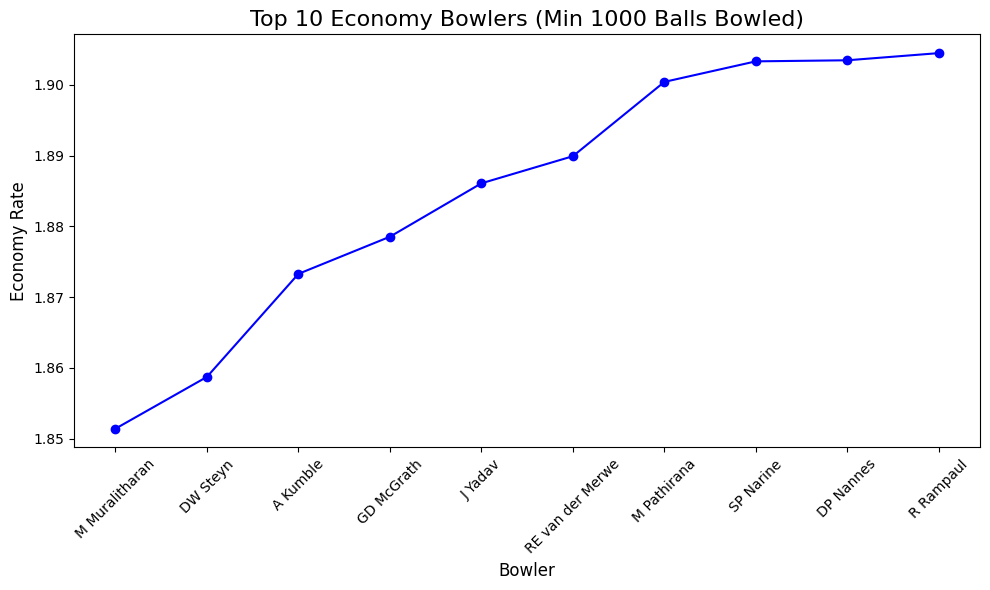

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_economy_bowlers['bowler'], top_10_economy_bowlers['economy_rate'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Economy Bowlers (Min 1000 Balls Bowled)', fontsize=16)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Economy Rate', fontsize=12)
plt.xticks(rotation=45) #for better readability
plt.tight_layout()
plt.show()

C:\Users\Navya Sree\AppData\Local\Temp\ipykernel_19684\2321215889.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_inning_stats['bowling_average'].replace([float('inf'), None], 0, inplace=True)


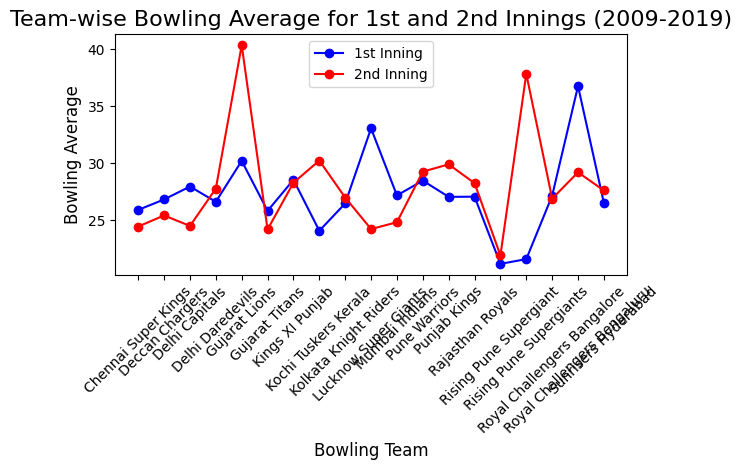

In [23]:
# Group by both 'bowling_team' and 'inning' to calculate total runs conceded and wickets taken for each
team_inning_stats = df.groupby(['bowling_team', 'inning']).agg(
    total_runs_conceded=pd.NamedAgg(column='total_runs', aggfunc='sum'),
    total_wickets=pd.NamedAgg(column='is_wicket', aggfunc='sum')
).reset_index()

team_inning_stats['bowling_average'] = team_inning_stats['total_runs_conceded'] / team_inning_stats['total_wickets']
team_inning_stats['bowling_average'].replace([float('inf'), None], 0, inplace=True)

# Separate data for 1st and 2nd innings
first_innings = team_inning_stats[team_inning_stats['inning'] == 1]
second_innings = team_inning_stats[team_inning_stats['inning'] == 2]

# Plotting 1st innings
plt.plot(first_innings['bowling_team'], first_innings['bowling_average'], marker='o', linestyle='-', color='b', label='1st Inning')

# Plotting 2nd innings
plt.plot(second_innings['bowling_team'], second_innings['bowling_average'], marker='o', linestyle='-', color='r', label='2nd Inning')

plt.title('Team-wise Bowling Average for 1st and 2nd Innings (2009-2019)', fontsize=16)
plt.xlabel('Bowling Team', fontsize=12)
plt.ylabel('Bowling Average', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()